# Limpeza dos dados
## Roubo de Veiculos

Com os dados obtidos  e já compilados, o próximo passo é realizar a limpeza do dataset
Isso consiste em:
 - Separar a cidade de São Bernardo do Campo
 - Verificar valores nulos
 - Campos duplicados
 - Remover informações que não serão úteis
 - Acertar ou remover informações erradas

### Importar as bibliotecas

As bibliotecas que serão utilizadas são:
 - `Pandas` - Manipulação do dataset
 - `Matplotlib` - Visualização dos dados
 - `Seaborn`- Visualização dos dados
 - `Numpy` - habilita propriedades matemáticas

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregar o dataset de roubo de veiculos

Carregar o dataset, verificar suas dimensões e ter as primeiras impressões

In [2]:
path = 'data_cleaned/roubo_veiculo2010_2020.csv'

df = pd.read_csv(path, low_memory=False) # Utilizado o low_memory = False devido ao tamnho do arquivo

In [3]:
print('{} Linhas\n{} Colunas'.format(df.shape[0],df.shape[1]))
df.head() # Mostra as 5 primeiras linhas do dataset

1805887 Linhas
54 Colunas


,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2009,1777,1777/2009,31/12/2009 23:47:02,01/01/2010 00:02:23,31/12/2009,21:00,A NOITE,31/12/2009,31/12/2009 23:47:02,...,COL8760,SP,SAO PAULO,Cinza,FIAT/UNO MILLE EX,1999.0,1999.0,AUTOMOVEL,NaN,NaN
1,2010,1,1/2010,01/01/2010 00:01:56,01/01/2010 00:06:30,31/12/2009,23:30,A NOITE,31/12/2009,01/01/2010 00:01:56,...,EFW1311,SP,SAO PAULO,Branco,GM/MERIVA MAXX,2008.0,2009.0,AUTOMOVEL,NaN,NaN
2,2009,15657,15657/2009,31/12/2009 23:37:53,01/01/2010 00:08:27,31/12/2009,22:30,A NOITE,31/12/2009,31/12/2009 23:37:53,...,DZK4423,SP,CAMPINAS,Prata,FIAT/PALIO WK ADVEN FLEX,2007.0,2007.0,AUTOMOVEL,NaN,NaN
3,2009,6168,6168/2009,31/12/2009 23:56:36,01/01/2010 00:11:19,31/12/2009,22:15,A NOITE,31/12/2009,31/12/2009 23:56:36,...,ECS7846,SP,DIADEMA,Amarelo,HONDA/CBX 250 TWISTER,2008.0,2008.0,MOTOCICLO,NaN,NaN
4,2009,15059,15059/2009,01/01/2010 00:03:03,01/01/2010 00:17:20,31/12/2009,21:30,A NOITE,31/12/2009,01/01/2010 00:03:03,...,DDW8049,SP,SAO BERNARDO DO CAMP,Verde,IMP/FIAT SIENA ELX,2001.0,2001.0,AUTOMOVEL,NaN,NaN


### Extrair os dados da cidade de Sâo Bernardo do Campo

Como o foco da análise será somente a cidade de São Bernardo do Campo, deve-se entender como foi registrado o nome das cidades e achar a cidade escolhida.

In [4]:
df.CIDADE.unique()

array(['CUBATAO', 'S.PAULO', 'CAMPINAS', 'DIADEMA', 'S.ANDRE',
       'ITAQUAQUECETUBA', 'S.JOSE DO RIO PRETO', 'S.JOSE DOS CAMPOS',
       'FRANCO DA ROCHA', 'ANDRADINA', 'S.BERNARDO DO CAMPO', 'OSASCO',
       'GUARULHOS', 'S.SEBASTIAO', 'PERUIBE', 'CARAGUATATUBA', 'SUMARE',
       'VOTUPORANGA', 'EMBU', 'CARAPICUIBA', 'PRAIA GRANDE', 'S.VICENTE',
       'FRANCISCO MORATO', 'RIBEIRAO PRETO', 'BARUERI', 'ITANHAEM',
       'CAJAMAR', 'TABOAO DA SERRA', 'AMERICANA', 'RIBEIRAO PIRES',
       'HORTOLANDIA', 'LIMEIRA', 'MAUA', 'COTIA', 'PIRACICABA',
       'SOROCABA', 'VARGEM GRANDE PAULISTA', 'INDAIATUBA', 'RIO CLARO',
       'SUZANO', 'S.CAETANO DO SUL', 'FERRAZ DE VASCONCELOS', 'JACAREI',
       'MARILIA', 'S.LOURENCO DA SERRA', 'MOGI DAS CRUZES', 'MONGAGUA',
       'POA', 'EMBU-GUACU', 'TAUBATE', 'ARACATUBA', 'MAIRIPORA', 'BAURU',
       'PINDAMONHANGABA', 'VALINHOS', 'JUNDIAI', 'CAIEIRAS',
       'GUARATINGUETA', 'ATIBAIA', 'SANTOS', 'ITAPECERICA DA SERRA',
       'ARUJA', 'PIRASSUNUN

Criar um novo dataframe apenas com a cidade de São Bernardo do Campo e verificar suas dimensões

In [5]:
dfsbc = df.loc[df.CIDADE == 'S.BERNARDO DO CAMPO']
print('{} Linhas\n{} Colunas'.format(dfsbc.shape[0],dfsbc.shape[1]))

68201 Linhas
54 Colunas


### Verificar dados nulos e ausentes

É possivel ver que pelo menos 19 colunas possuem mais de 90% de dados ausentes, a grande maioria relacionado a dados pessoais.

Essas as quais podem ser diretamente removidas do dataset.

Abaixo a lista ordenada em % dos primeiros 35 mais ausentes

In [6]:
nulos = dfsbc.isnull().sum().sort_values(ascending=False)*100 / dfsbc.shape[0]
nulos.head(35)

MARCA_CELULAR               100.000000
PARENTESCO                  100.000000
QUANT_CELULAR               100.000000
RELACIONAMENTO              100.000000
PROFISSAO                    99.862172
GRAUINSTRUCAO                99.771264
ESTADOCIVIL                  99.674492
NACIONALIDADE                99.665694
NATURALIDADE                 99.648099
DATANASCIMENTO               99.643700
IDADE                        99.586516
SEXO                         99.552792
VITIMAFATAL                  99.548394
TIPOVINCULO                  99.548394
NATUREZAVINCULADA            99.548394
CORCUTIS                     99.548394
TIPOPESSOA                   99.548394
DESDOBRAMENTO                96.568965
NUMERO_BOLETIM_PRINCIPAL     95.922347
EXAME                        81.042800
PLACA_VEICULO                29.241507
DESCR_MARCA_VEICULO          29.178458
CIDADE_VEICULO               29.077286
UF_VEICULO                   28.668201
DESCR_TIPO_VEICULO           28.590490
DESCR_COR_VEICULO        

Uma outra maneira de ter uma visão geral é utilizando a função `Heatmap` da biblioteca `Seaborn`

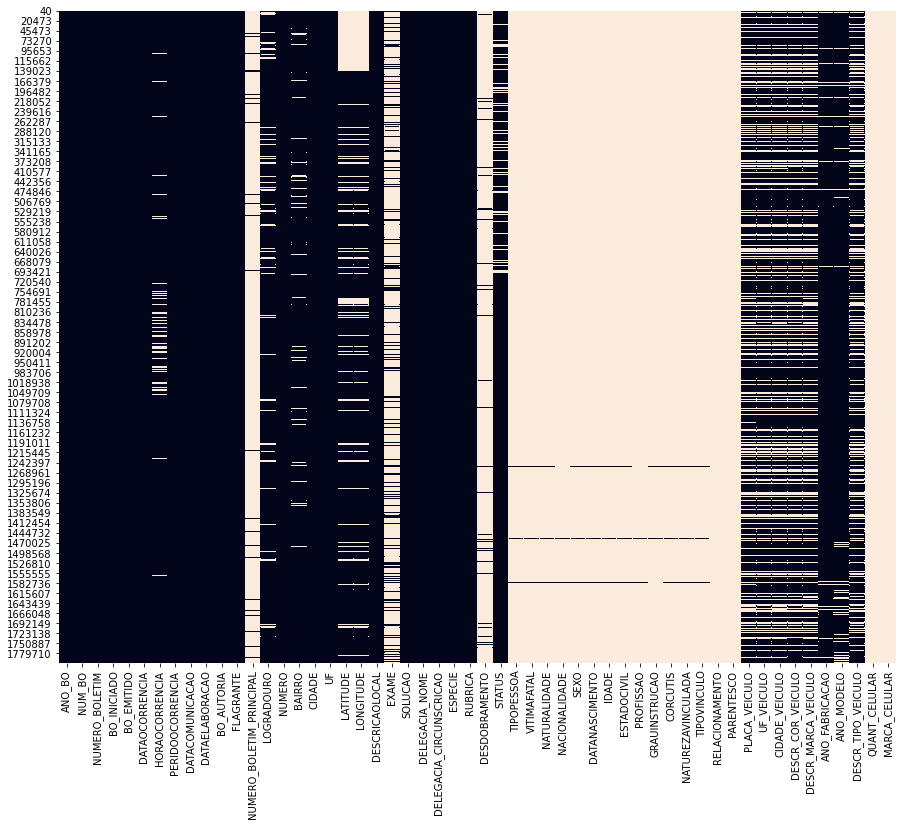

In [7]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

### Remover colunas e dados indesejados

Primeiramente avaliar entre as colunas que tem mais que 70% dos dados ausentes o que é possível eliminar e criar uma lista com esses campos

In [8]:
nulos.index[nulos > 0.7]

Index(['MARCA_CELULAR', 'PARENTESCO', 'QUANT_CELULAR', 'RELACIONAMENTO',
       'PROFISSAO', 'GRAUINSTRUCAO', 'ESTADOCIVIL', 'NACIONALIDADE',
       'NATURALIDADE', 'DATANASCIMENTO', 'IDADE', 'SEXO', 'VITIMAFATAL',
       'TIPOVINCULO', 'NATUREZAVINCULADA', 'CORCUTIS', 'TIPOPESSOA',
       'DESDOBRAMENTO', 'NUMERO_BOLETIM_PRINCIPAL', 'EXAME', 'PLACA_VEICULO',
       'DESCR_MARCA_VEICULO', 'CIDADE_VEICULO', 'UF_VEICULO',
       'DESCR_TIPO_VEICULO', 'DESCR_COR_VEICULO', 'LATITUDE', 'LONGITUDE',
       'LOGRADOURO', 'STATUS', 'BAIRRO', 'HORAOCORRENCIA', 'ANO_MODELO',
       'ANO_FABRICACAO'],
      dtype='object')

Os campos pessoais podem ser diretamente eliminados, assim como marca e quantidade de celular para os demais campos será analisado a real necessidade

In [9]:
eliminar = ['MARCA_CELULAR', 'PARENTESCO', 'QUANT_CELULAR', 'RELACIONAMENTO', 'NACIONALIDADE', 'PROFISSAO',
       'GRAUINSTRUCAO', 'NATURALIDADE', 'DATANASCIMENTO', 'ESTADOCIVIL',
       'IDADE', 'NATUREZAVINCULADA', 'TIPOPESSOA', 'SEXO', 'CORCUTIS',
       'TIPOVINCULO']

In [10]:
dfsbc.drop(eliminar, axis=1, inplace=True)

C:\Users\caior\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
dfsbc.shape

(68201, 38)

### Analisando demais colunas

Usar comando abaixo para ajustar configurações de visualização do pandas para explorar os dados das colunas

In [12]:
pd.set_option('display.max_columns', 60) # Define limite de 60 colunas na visualização
#pd.set_option('display.max_seq_items', 30) # Define limite de linhas na visualização

Selecionar somente os campos onde há vitima fatal e contar.

De acordo com o site da SSP-SP, a referência de quantidade de Boletins de Ocorrência deve ser pelo Número do Boletim (NUMERO_BOLETIM).

Neste caso, houve 22 vitimas fatais entre 2010 e 2020,

Por esta razão os dados serão mantidos, apenas a coluna será removida



In [13]:
vitimafatal = dfsbc[dfsbc['VITIMAFATAL'].isnull()==False]
total_vf = len(vitimafatal['NUMERO_BOLETIM'].unique())
print(total_vf, 'vitimas fatais de 2010 à 2020')

39 vitimas fatais de 2010 à 2020


Neste caso, houve 39 vitimas fatais entre 2010 e 2020,

Por esta razão os dados serão mantidos, apenas a coluna `'VITIMAFATAL'` será removida.

Os campos `'DESDOBRAMENTO'`, `'EXAME'`, possuem informações que não são relevantes para a ánalise, porém os dados devem ser mantidos, removendo apenas as colunas

In [14]:
dfsbc.EXAME.unique()

array([nan, 'IC-IML', 'IC', 'IML'], dtype=object)

In [15]:
dfsbc.DESDOBRAMENTO.unique()

array([nan,
       'caput. Subtrair coisa móvel alheia, mediante grave ameaça ou violência a pessoa',
       'Nas mesmas penas incorrem quem (Par. único)',
       '§3o. Se da violência resulta lesão corporal grave:',
       '§1o. (...) logo depois de subtraída a coisa, emprega violência contra pessoa',
       'Morte decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)',
       '§4o. Se o crime é cometido:',
       'Lesão corporal decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)',
       '§2o. Se resulta grave sofrimento físico ou moral',
       'I - com violência à pessoa ou grave ameaça;',
       'Possuir, deter, portar, adquirir, fornecer, receber, ter em depósito...',
       '§3o. Se da violência resulta lesão corporal grave',
       'Contra autoridade ou agente descrito nos arts. 142 e 144 da Constituição Federal',
       'Caput Corromper ou facilitar a corrupção de menor de 18 (dezoito) anos',
       'caput. Opor-se à execução de ato legal, mediante violência

In [16]:
eliminar = ['VITIMAFATAL', 'DESDOBRAMENTO', 'EXAME']

dfsbc.drop(eliminar, axis=1, inplace=True)

C:\Users\caior\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
dfsbc.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
40,2010,3,3/2010,01/01/2010 02:49:46,01/01/2010 02:57:54,31/12/2009,23:15,A NOITE,01/01/2010,01/01/2010 02:49:46,Desconhecida,Não,NaN,R ROLANDO GAMBINI,100.0,ASSUNÇÃO,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,03º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,GZW4772,SP,SAO BERNARDO DO CAMP,Cinza,FIAT/PALIO EX,2002.0,2002.0,AUTOMOVEL
56,2009,15057,15057/2009,31/12/2009 23:27:18,01/01/2010 05:31:49,31/12/2009,21:38,A NOITE,31/12/2009,31/12/2009 23:27:18,Conhecida,Sim,NaN,AV BARAO DE MAUA,559.0,CHACARA INGLESA,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,BO PARA FLAGRANTE,01º D.P. S.B.C-DR OMAR CASSIM,01º D.P. S.B.C-DR OMAR CASSIM,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,DRQ4515,SP,SAO BERNARDO DO CAMP,Prata,VW/FOX 1.6 PLUS,2005.0,2006.0,AUTOMOVEL
116,2010,22,22/2010,01/01/2010 14:12:44,01/01/2010 14:17:52,31/12/2009,21:00,A NOITE,01/01/2010,01/01/2010 14:12:44,Desconhecida,Não,NaN,R CIDADE DO MEXICO,51.0,NaN,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,03º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,EIP4923,SP,SAO BERNARDO DO CAMP,Preta,VW/GOL 1.0,2009.0,2010.0,AUTOMOVEL
149,2010,9,9/2010,01/01/2010 20:31:31,01/01/2010 20:52:32,01/01/2010,19:10,A NOITE,01/01/2010,01/01/2010 20:31:31,Desconhecida,Não,NaN,NaN,0.0,ALVINÓPOLIS,S.BERNARDO DO CAMPO,SP,NaN,NaN,Residência,ENCAMINHAMENTO DP ÁREA DO FATO,02º D.P. S.BERNARDO DO CAMPO,05º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,DDS2135,SP,SAO BERNARDO DO CAMP,Azul,FIAT/PALIO YOUNG,2001.0,2001.0,AUTOMOVEL
151,2010,10,10/2010,01/01/2010 21:04:59,01/01/2010 21:12:34,01/01/2010,20:00,A NOITE,01/01/2010,01/01/2010 21:04:59,Desconhecida,Não,NaN,R JOAO DEPOLLI,115.0,V PAULICÉIA,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,ENCAMINHAMENTO DP ÁREA DO FATO,02º D.P. S.BERNARDO DO CAMPO,05º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,DQR9216,SP,SAO BERNARDO DO CAMP,Preta,HONDA/FIT LXL,2005.0,2006.0,AUTOMOVEL


In [18]:
dfsbc.shape

(68201, 35)

Plotar novamente o gráfico *heatmap* para verificar como ficou o dataset após a eliminação dos dados anteriores

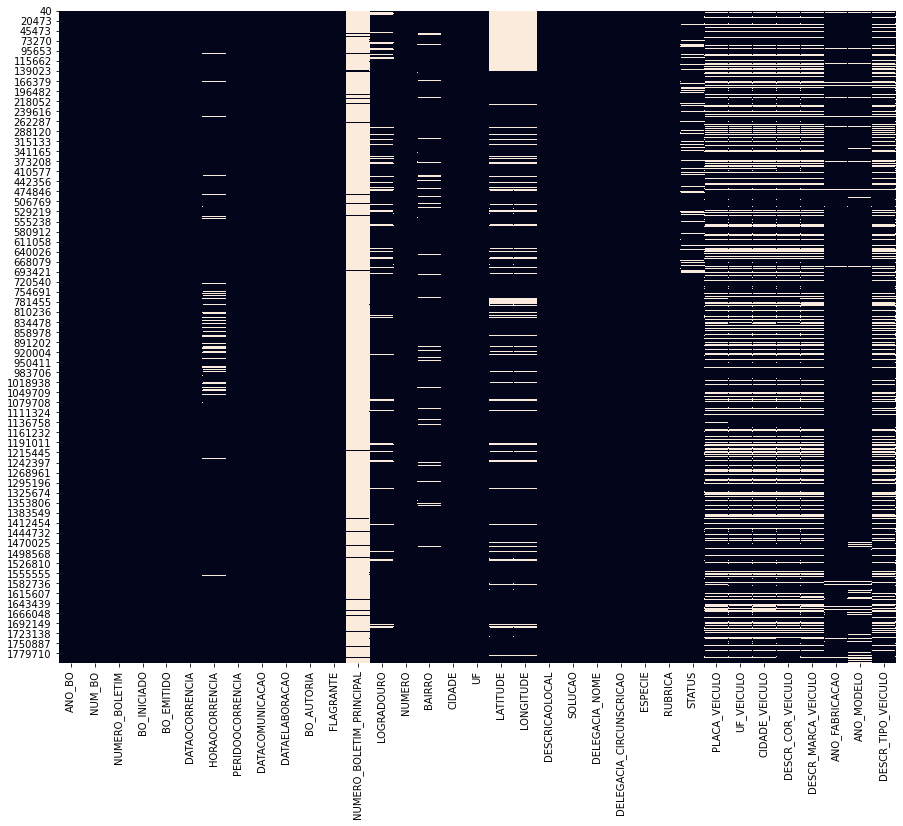

In [19]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

## Verificando Outliers

Ao executar o comando `.describe()`, é possível visualizar que na coluna `ANO_MODELO` tem algum valor não correto, pois é maior do que a data atual

In [20]:
display(dfsbc.describe())

,ANO_BO,NUM_BO,NUMERO,ANO_FABRICACAO,ANO_MODELO
count,68201.000000,6.820100e+04,6.820100e+04,67023.000000,65839.000000
mean,2014.549713,6.780696e+04,1.534994e+04,1443.892902,1434.094093
std,2.915058,2.660687e+05,3.610610e+06,903.328473,909.441790
min,2009.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,2012.000000,1.546000e+03,1.000000e+01,0.000000,0.000000
50%,2014.000000,3.742000e+03,1.150000e+02,2008.000000,2008.000000
75%,2017.000000,7.605000e+03,5.060000e+02,2011.000000,2012.000000
max,2020.000000,2.038468e+06,9.428187e+08,2020.000000,9150.000000


Abaixo um *boxplot* e um gráfico de densidade para melhor visualizar estes *outliers*

No caso um comparativo do `ANO_FABRICAÇÃO` com `ANO_MODELO` onde os 2 apresentam valores nulos (representados como zeros)

# Ajustar Layout - escala X

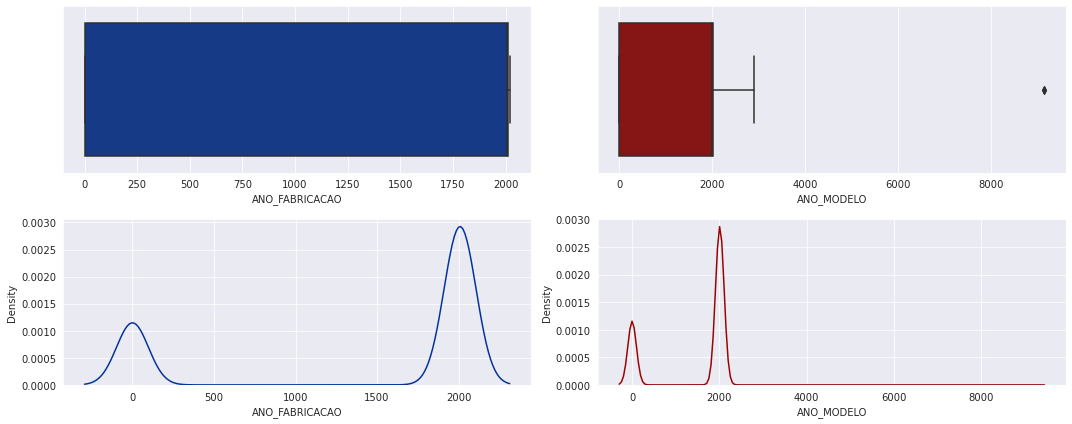

In [21]:
f = plt.figure(figsize=(15, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=dfsbc['ANO_FABRICACAO'], color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=dfsbc['ANO_MODELO'], color='#990303')


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(x=dfsbc['ANO_FABRICACAO'], ax=ax, color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.kdeplot(x=dfsbc['ANO_MODELO'], ax=ax, color='#990303')

f.tight_layout()

Para visualizar e entender quais são e quantos são os tipos de erros, serão selecionados todas as entradas e ordenadas do maior para o menor

Apesar da base de dados ser até o ano de 2020, é comum as montadoras lançarem carros modelo 2021 ainda no ano de 2020

In [23]:
dfsbc['ANO_MODELO'].sort_values(ascending=False).unique()

array([9150., 2911., 2021., 2020., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007., 2006.,
       2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998., 1997.,
       1996., 1995., 1994., 1993., 1992., 1991., 1990., 1989., 1988.,
       1987., 1986., 1985., 1984., 1983., 1982., 1981., 1980., 1979.,
       1978., 1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970.,
       1969., 1968., 1967., 1964., 1962., 1000.,  600.,  420.,  416.,
        150.,   10.,    0.,   nan])

Será criada uma restrição de "ANO_MODELO" onde as entradas maiores que estiverem nas condições descritas abaixo serão consideradas como "0"

 - **Condição 1** - "ANO_MODELO" > 2021
 - **Condição 2** - "ANO_MODELO" < 1900 e "ANO_MODELO" > 0  
  

In [44]:
condicao1 = (dfsbc['ANO_MODELO'] > 2021)
condicao2 = (((dfsbc['ANO_MODELO'] < 1900) & (dfsbc['ANO_MODELO'] > 0)))

In [46]:
# Substitui os valores da condiçao 1 e 2 para "0"
dfsbc['ANO_MODELO'] = np.where(condicao1 | condicao2, 0, dfsbc['ANO_MODELO'])

<ipython-input-46-6680a13d02d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsbc['ANO_MODELO'] = np.where(condicao1 | condicao2, 0, dfsbc['ANO_MODELO'])


Ao verificar novamente o *array* de anos únicos, podemos ver que não temos mais *outliers*

In [48]:
dfsbc['ANO_MODELO'].sort_values(ascending=False).unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977.,
       1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968.,
       1967., 1964., 1962.,    0.,   nan])

In [53]:
plot = dfsbc['ANO_MODELO'].loc[(((dfsbc['ANO_MODELO'] > 1900) & (dfsbc['ANO_MODELO'] != 0)))]

In [54]:
plot.unique()

array([2002., 2006., 2010., 2001., 2004., 2000., 1993., 1995., 1997.,
       2009., 2008., 1992., 2007., 2003., 1998., 2005., 1999., 1991.,
       1994., 1973., 1986., 1974., 2011., 1996., 1989., 1983., 1970.,
       1982., 1990., 1987., 1976., 1980., 1985., 1978., 1981., 1988.,
       1967., 1972., 1979., 1971., 2012., 1964., 1975., 1984., 2013.,
       1977., 1969., 1962., 2014., 2015., 2016., 2017., 2018., 1968.,
       2019., 2020., 2021.])

# Ajustar Layout - escala X

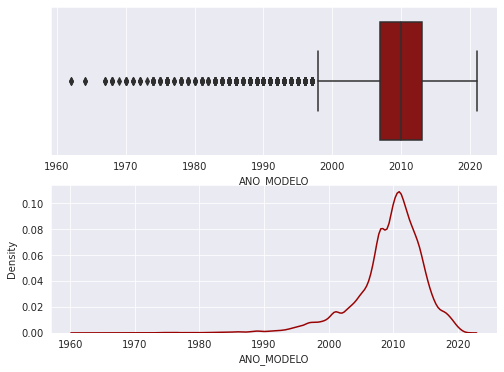

In [55]:
f = plt.figure(figsize=(8, 6))
gs = f.add_gridspec(2, 1)


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=plot, color='#990303')


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(x=plot, ax=ax, color='#990303')

#f.tight_layout()

## Ajuste do tipo das variáveis


Os campos `NUMERO`, `ANO_FABRICACAO`, `ANO_MODELO` e serão convertidos para inteiros,

*obs: os valores apresentados como NaN serão preenchidos com "0"*

In [57]:
#nos campos NUMERO, ANO_FABRICACAO e ANO_MODELO  os valores apresentados como NaN serão preenchidos com "0"
lista_int = ['NUMERO', 'ANO_FABRICACAO', 'ANO_MODELO']
for i in lista_int:
    dfsbc[i] = pd.to_numeric(dfsbc[i].replace(np.nan, 0), downcast='integer', errors='coerce')

<ipython-input-57-c4a6781daa71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsbc[i] = pd.to_numeric(dfsbc[i].replace(np.nan, 0), downcast='integer', errors='coerce')


In [58]:
dfsbc[['NUMERO', 'ANO_FABRICACAO', 'ANO_MODELO']].isna().sum()

NUMERO            0
ANO_FABRICACAO    0
ANO_MODELO        0
dtype: int64

In [59]:
dfsbc.dtypes

ANO_BO                       int64
NUM_BO                       int64
NUMERO_BOLETIM              object
BO_INICIADO                 object
BO_EMITIDO                  object
DATAOCORRENCIA              object
HORAOCORRENCIA              object
PERIDOOCORRENCIA            object
DATACOMUNICACAO             object
DATAELABORACAO              object
BO_AUTORIA                  object
FLAGRANTE                   object
NUMERO_BOLETIM_PRINCIPAL    object
LOGRADOURO                  object
NUMERO                       int32
BAIRRO                      object
CIDADE                      object
UF                          object
LATITUDE                    object
LONGITUDE                   object
DESCRICAOLOCAL              object
SOLUCAO                     object
DELEGACIA_NOME              object
DELEGACIA_CIRCUNSCRICAO     object
ESPECIE                     object
RUBRICA                     object
STATUS                      object
PLACA_VEICULO               object
UF_VEICULO          

## Salvar o arquivo em um novo arquivo *.csv*

In [60]:
dfsbc.to_csv('data_cleaned/roubos_veic_sbc.csv', index=False)